#3. Кластерный анализ методом DBSCAN

Аккуратова Дарья Александровна 337100

студент, 1-й курс, группа S41032, факультет ВШ ЦК 

Задание:

Определить число кластеров и обосновать свой выбор. Разбить объекты на кластеры. Предложить и обосновать интерпретацию кластеров.

Данные для лабораторной работы выложены в архиве Lect_04.zip. Слушатели, чья фамилия начинается на буквы А - К решают задачу из папки задача_1_леденцы. Слушатели, чья фамилия начинается на буквы Л - Я решают задачу из папки Задача_2_Economics of Cities. Любой желающий может вместо указанной выше задачи решать задачу из папки задача_3_цифры.


Ответ:

Согласно решению можно предположить, что разделение на 4 кластера будет являтся самым оптимальным.

Разделение будет следующим: в 1-й кластер (степень согласия у которых с высказываниями следующих пунктов были более ярко выражены: V9,V10,V11) вошли те респонденты, которые потребляют леденцы с целью замены лекарственного средства, во 2-й (V1,V2,V3,V4) - с целью улучшить запах и вкус во рту, в 3-й (V7,V8) - с целью переключиться на мыслительный процесс, а в 4-й кластер (V5,V6) можно отнести потребителей-сладкоежек, которые употребляют леденцы с целью получить вкусовое удовольствие.

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # для сравнения с иерархич класт анализом. можно удалить

In [25]:
df = pd.read_csv("Л•§•≠жл.dat", sep=";")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [26]:
df.shape

(338, 11)

In [27]:
# Шаг первый. Подбираем параметры

# Создадим объект DBSCAN, зададим значения параметров
# Значения 3-х первых параметров совпадают со значениями "по умолчанию"

dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5) # улучшаем кластеризацию с помощью параметров eps=0.5 и min_samples=5
dbscan_1.fit(df) # обучим модель  DBSCAN
dbscan_1.labels_ # в какой кластер попало наблюдение - массив номеров кластеров

array([ 0,  1, -1,  1,  0,  1, -1,  1,  2, -1, -1, -1,  3, -1, -1,  3,  3,
        3,  3,  3,  3,  3, -1,  3,  3,  3,  3, -1, -1, -1,  2,  2,  0,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4, -1,
        4, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,  2,
        2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0, -1, -1,  0,  0,  0, -1,
       -1,  0,  0,  0,  2,  2,  2,  2, -1,  5, -1,  5,  5,  5,  6,  6,  5,
        5,  6,  5,  7, -1,  6,  7,  7,  5,  5,  5,  5,  5,  6,  5,  5,  5,
        5,  5,  6, -1,  5,  6,  5,  7,  6,  5, -1,  5,  6,  7,  5,  5,  5,
        5,  6,  5,  5,  5,  5,  5,  5,  6,  5,  5,  5,  5, -1,  5,  7,  5,
       -1,  5, -1,  6,  5,  5,  7, -1, -1,  8,  8,  8, -1, -1, -1, -1,  5,
        5, -1,  8, -1, -1, -1,  8,  8, -1, -1,  5,  5,  5,  5,  5,  7,  5,
       -1, -1,  6,  6,  5,  7, -1, -1, -1, -1, -1,  7, -1,  6,  9, 10, 11,
       10, 11,  9,  9,  9

In [28]:
# Создаем таблицу частот 

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 60]
 [ 0 10]
 [ 1  5]
 [ 2 49]
 [ 3 12]
 [ 4  9]
 [ 5 49]
 [ 6 15]
 [ 7 10]
 [ 8  6]
 [ 9 37]
 [10 10]
 [11  5]
 [12  9]
 [13 52]]


In [29]:
# Второй шаг. Подбираем параметры, чтобы кластеры были сопоставимы

dbscan_1 = DBSCAN(eps=2, metric='euclidean', min_samples=5) # увеличим значение eps

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   4]
 [  0 110]
 [  1 104]
 [  2 120]]


In [30]:
dbscan_1 = DBSCAN(eps=2, metric='euclidean', min_samples=4) # оставим значение eps, уменьшим значение min_samples

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 110]
 [  1 104]
 [  2   4]
 [  3 120]]


In [31]:
dbscan_1 = DBSCAN(eps=1.9, metric='euclidean', min_samples=5) # уменьшим значение eps, вернем значение min_samples=5

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   6]
 [  0 110]
 [  1 104]
 [  2  61]
 [  3  57]]


In [32]:
# Восстановим предыдущее значение 

dbscan_2 = DBSCAN(eps=2, metric='euclidean', min_samples=5) # увеличим значение eps

dbscan_2.fit(df)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   4]
 [  0 110]
 [  1 104]
 [  2 120]]


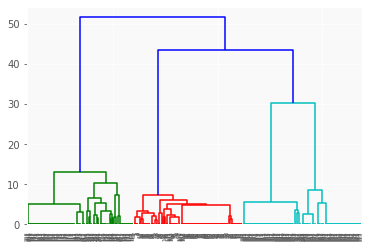

In [33]:
# Cравнение с результатами иерархического кластерного анализа этих же данных

link = linkage(df, 'ward', 'euclidean') # объект, в котором будет хранится информация о последовательном слиянии кластеров
dn = dendrogram(link)

In [34]:
df['cluster'] = fcluster(link, 4, criterion='maxclust') # maxclust - для разбиения по заданному числу кластеров

In [35]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [36]:
# Информация о кластерах dbscan добавляется в таблицу данных в виде столбца

df['dbscan_1'] = dbscan_1.labels_
df['dbscan_2'] = dbscan_2.labels_

In [37]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster,dbscan_1,dbscan_2
0,4,5,5,5,3,3,3,3,3,3,3,2,0,0
1,5,4,5,5,3,3,3,3,3,3,3,2,0,0
2,5,5,4,5,3,3,3,3,3,3,3,2,0,0
3,5,4,5,5,3,3,3,3,3,3,3,2,0,0
4,4,5,5,5,3,3,3,3,3,3,3,2,0,0


In [38]:
# Таблица сопряженности для двух кластеризаций

# Сравним первую кластеризацию с результатами иерархического кластерного анализа этих же данных

tab1 = pd.crosstab(df['dbscan_1'], df['cluster'])

print(tab1)


cluster     1    2   3   4
dbscan_1                  
-1          4    0   2   0
 0          0  110   0   0
 1        104    0   0   0
 2          0    0   0  61
 3          0    0  57   0


In [39]:
#  Сравним вторую кластеризацию с результатами иерархического кластерного анализа этих же данных

tab2 = pd.crosstab(df['dbscan_2'], df['cluster'])

print(tab2)


cluster     1    2   3   4
dbscan_2                  
-1          4    0   0   0
 0          0  110   0   0
 1        104    0   0   0
 2          0    0  59  61


In [40]:
df.groupby(dbscan_1.labels_).mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster,dbscan_1,dbscan_2
-1,2.333333,3.333333,3.333333,3.333333,2.000000,2.333333,3.000000,3.666667,4.333333,4.166667,4.166667,1.666667,-1.0,0.0
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.000000,0.0,0.0
1,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385,1.000000,1.0,1.0
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,4.000000,2.0,2.0
3,3.000000,3.000000,3.000000,2.947368,2.947368,2.947368,4.912281,4.912281,3.000000,3.000000,3.000000,3.000000,3.0,2.0


Получено почти то же решение, что и в иерархическом кластерном анализе.

Вывод:

Во всех трех лабораторных работах на одних и тех же исходных данных были применены иерархический кластерный анализ, кластерный анализ методом к-средних (k-means) и кластерный анализ методом DBSCAN.

Согласно приведенному решению во всех трех работах разделение респондентов на 4 кластера, которые потребляют леденцы, является самым оптимальным. Иерархический кластерный анализ и кластерный анализ методом k-средних показали себя наиболее точно и удобно на примере данного набора данных.

Предпложена следующая интерпретация результатов деления на кластеры потребителей леденцов: 

1-й кластер - целью которых является замена лекарственного средства, 2-й - с целью улучшить запах и вкус во рту, 3-й - с целью переключиться на мыслительный процесс, 4-й - с целью получить вкусовое удовольствие, то есть это явные любители сладкого.